# assignment2
## Shang mingxia P-COM0077/19

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine 
wine = load_wine()

In [14]:
wine_pd = pd.DataFrame(wine.data)
wine_pd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [15]:
wine_pd.columns=wine.feature_names

In [16]:
wine_pd.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


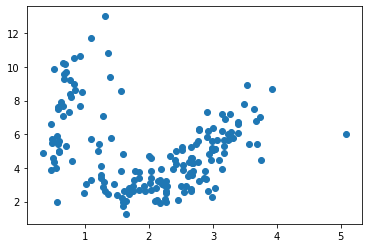

In [20]:
from matplotlib import pyplot as plt 
plt.scatter(wine_pd.flavanoids, wine_pd.color_intensity)

In [28]:
df=wine_pd[['flavanoids','color_intensity']]

In [29]:
df

,flavanoids,color_intensity
0,3.06,5.640000
1,2.76,4.380000
2,3.24,5.680000
3,3.49,7.800000
4,2.69,4.320000
5,3.39,6.750000
6,2.52,5.250000
7,2.51,5.050000
8,2.98,5.200000
9,3.15,7.220000


In [30]:
 from sklearn.cluster import KMeans
init_centroids = np.array([[0.8,8],[2.5,3]])
kmeans = KMeans(n_clusters=2, init=init_centroids, n_init=1) 
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True,
       init=array([[0.8, 8. ],
       [2.5, 3. ]]), max_iter=300, n_clusters=2,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [31]:
print(kmeans.cluster_centers_)

[[1.6644186  8.40023253]
 [2.14548148 3.99355556]]


Text(2.3, 1, 'cluster 2')

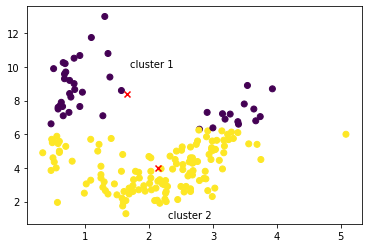

In [35]:
fig, ax = plt.subplots()
plt.scatter(wine_pd['flavanoids'],wine_pd['color_intensity'],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],marker='x', color='red') 
ax.annotate('cluster 1', xy=(1.7,10)) 
ax.annotate('cluster 2', xy=(2.3,1))

In [48]:
init_centroids = np.array([[1.6,8],[2.1,4],[3.5,8]])
kmeans = KMeans(n_clusters=3, init=init_centroids, n_init=1)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True,
       init=array([[1.6, 8. ],
       [2.1, 4. ],
       [3.5, 8. ]]),
       max_iter=300, n_clusters=3, n_init=1, n_jobs=None,
       precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

In [53]:
print(kmeans.cluster_centers_)
kmeans.labels_

[[1.04866667 9.0263333 ]
 [1.94883117 3.04597403]
 [2.53084507 5.56352113]]


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [54]:
model_labels = np.copy(kmeans.labels_)
model_labels[model_labels==0] = 3 
model_labels[model_labels==2] = 0 
model_labels[model_labels==3] = 2

Text(2.2, 6, 'cluster 3')

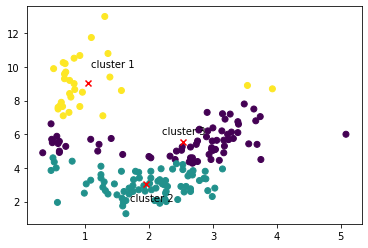

In [55]:
fig, ax = plt.subplots()
plt.scatter(wine_pd['flavanoids'],wine_pd['color_intensity'],c=model_labels)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],marker='x', color='red') 
ax.annotate('cluster 1', xy=(1.1,10)) 
ax.annotate('cluster 2', xy=(1.7,2))
ax.annotate('cluster 3', xy=(2.2,6))

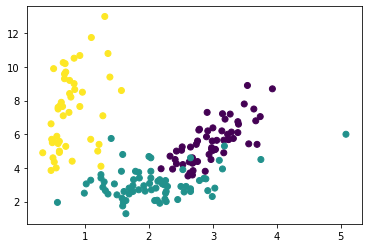

In [56]:
plt.scatter(wine_pd['flavanoids'], wine_pd['color_intensity'], c=wine.target)

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
print(confusion_matrix(wine.target, model_labels)) 
print(classification_report(wine.target, model_labels))

[[48  9  2]
 [ 9 62  0]
 [14  6 28]]
              precision    recall  f1-score   support

           0       0.68      0.81      0.74        59
           1       0.81      0.87      0.84        71
           2       0.93      0.58      0.72        48

    accuracy                           0.78       178
   macro avg       0.80      0.76      0.76       178
weighted avg       0.80      0.78      0.77       178



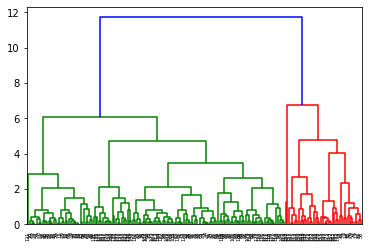

In [60]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(df, 'complete') 
dendrogram(linked, orientation='top', distance_sort='ascending',show_leaf_counts=False)
plt.show()

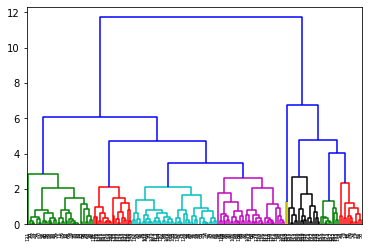

In [61]:
 dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=False, color_threshold=3.0)
plt.show()

In [76]:
from sklearn.cluster import AgglomerativeClustering
model1 = AgglomerativeClustering(n_clusters=3, linkage='complete') 
model1.fit(df)
model1.labels_

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1])

In [77]:
model2_labels = np.copy(model1.labels_) # copy the results 
model2_labels[model2_labels==0] = 3 
model2_labels[model2_labels==1] = 0 
model2_labels[model2_labels==3] = 1

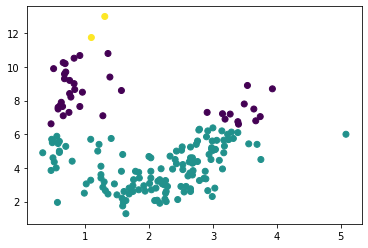

In [78]:
fig, ax = plt.subplots()
plt.scatter(wine_pd['flavanoids'], wine_pd['color_intensity'], c=model2_labels)

In [79]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
print(confusion_matrix(wine.target, model2_labels)) 
print(classification_report(wine.target, model2_labels))

[[12 47  0]
 [ 0 71  0]
 [27 19  2]]
              precision    recall  f1-score   support

           0       0.31      0.20      0.24        59
           1       0.52      1.00      0.68        71
           2       1.00      0.04      0.08        48

    accuracy                           0.48       178
   macro avg       0.61      0.42      0.34       178
weighted avg       0.58      0.48      0.38       178

